# DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# untuk membaca dataset raw
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Project/healthcare-dataset-stroke-data.csv')

In [ ]:
# melihat shape dataset raw
print(data.shape)
data.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# membagi data dependen (y) sebagai hasil output dan data independen(x) sebagai fitur/atribut buat prediksi
x = data.drop(columns=['stroke'])
y = data['stroke']

In [ ]:
# menghitung jumlah tiap kategori output
# 0 = tidak stroke
# 1 = stroke
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
# melakukan data preprocessing

data = data.dropna() # menghapus data kosong
data = data[data["smoking_status"].str.contains("Unknown") == False] # menghilangkan data smoking_status yang bernilai "Unknown"

# Label encoding -> mengubah data kategori kata menjadi kategori numerik
data['gender'].replace(['Female','Male','Other'], [0,1,2],inplace=True)
data['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
data['work_type'].replace(['Self-employed','Private', 'Govt_job', 'children', 'Never_worked'],[0,1,2,3,4],inplace=True)
data['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)
data['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,1,2],inplace=True)

<ipython-input-6-009d6faa0137>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'].replace(['Female','Male','Other'], [0,1,2],inplace=True)
<ipython-input-6-009d6faa0137>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
<ipython-input-6-009d6faa0137>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['work_type'].replace(['Self-employed','Private', 'Govt_job',

In [ ]:
# lihat lagi shape setelah di preprocessing
print(data.shape)
data.head()

(3426, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,0,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,1,1,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,1,0,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,0,1,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,1,0,186.21,29.0,1,1


In [ ]:
x = data.drop(columns=['stroke'])
y = data['stroke']

In [ ]:
y.value_counts()

0    3246
1     180
Name: stroke, dtype: int64

# LSTM (Uji Test Dataset)

In [ ]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [ ]:
# pembagian data training (80%) dan data test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
timesteps = 1 # melihat 1 langkah data yang disimpan sebelumnya
input_dim = 10 # jumlah fitur

# resize shape data independen
x_train_1 = np.resize(x_train, (x_train.shape[0], timesteps, input_dim))
x_test_1 = np.resize(x_test, (x_test.shape[0], timesteps, input_dim))

In [ ]:
x_train_1.shape

(2740, 1, 10)

In [ ]:
# membuat kedua data y menjadi categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Model Processing
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(LSTM(64))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# compiling
# loss = binary_crossentropy karena output terdiri dari 2 kelas
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model fitting
story = model.fit(x_train_1, y_train, epochs=20, batch_size=256, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0001)])
story

Epoch 1/20
10/10 [==============================] - 6s 127ms/step - loss: 0.6320 - accuracy: 0.9266 - val_loss: 0.5650 - val_accuracy: 0.9672
Epoch 2/20
10/10 [==============================] - 0s 20ms/step - loss: 0.5216 - accuracy: 0.9485 - val_loss: 0.4458 - val_accuracy: 0.9672
Epoch 3/20
10/10 [==============================] - 0s 19ms/step - loss: 0.4067 - accuracy: 0.9485 - val_loss: 0.3270 - val_accuracy: 0.9672
Epoch 4/20
10/10 [==============================] - 0s 20ms/step - loss: 0.3086 - accuracy: 0.9485 - val_loss: 0.2418 - val_accuracy: 0.9672
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 0.2484 - accuracy: 0.9485 - val_loss: 0.1920 - val_accuracy: 0.9672
Epoch 6/20
10/10 [==============================] - 0s 30ms/step - loss: 0.2194 - accuracy: 0.9485 - val_loss: 0.1667 - val_accuracy: 0.9672
Epoch 7/20
10/10 [==============================] - 0s 32ms/step - loss: 0.2066 - accuracy: 0.9485 - val_loss: 0.1566 - val_accuracy: 0.9672
Epoch 8/20
1

<ipython-input-18-c8f822d287a3>:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['accuracy'], ['val_accuracy'])


Text(0, 0.5, 'Accuracy [%]')

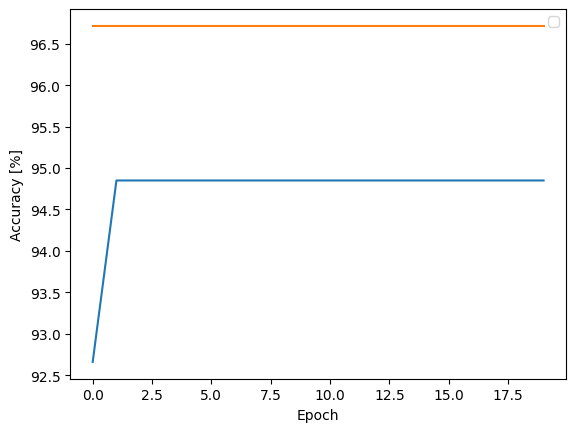

In [ ]:
# logging = untuk melihat grafik proses training pada model
import matplotlib.pyplot as plt

metrics = story.history
plt.plot(story.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
# dikalikan 100 karena ingin menampilan value dalam [%]

# biru = training accuracy
# orange = validation accuracy
plt.legend(['accuracy'], ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [ ]:
# Evaluasi model
model.evaluate(x_test_1,y_test)

22/22 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9359


[0.24458105862140656, 0.9358600378036499]

In [ ]:
# input library yang dipakai untuk performance metrics
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [ ]:
# predict output
y_pred_lstm = model.predict(x_test_1)
y_pred_lstm

22/22 [==============================] - 1s 3ms/step


array([[0.9620705 , 0.03720302],
       [0.93271774, 0.06730092],
       [0.94490236, 0.05326706],
       ...,
       [0.93271774, 0.06730092],
       [0.94490236, 0.05326705],
       [0.96188575, 0.03863114]], dtype=float32)

In [ ]:
# show the accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_lstm, axis=1))
accuracy

0.9358600583090378

In [ ]:
# Tampilkan Nilai Performasi Metrik nya
precision, recall, fscore, support = score(np.argmax(y_test, axis=1), np.argmax(y_pred_lstm, axis=1))

print('accuracy  : {}'.format(accuracy))
print('precision : {}'.format(precision))
print('recall    : {}'.format(recall))
print('f1_score  : {}'.format(fscore))
print('support   : {}'.format(support))
print('\n')

print(sklearn.metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_lstm, axis=1)))

accuracy  : 0.9358600583090378
precision : [0.93586006 0.        ]
recall    : [1. 0.]
f1_score  : [0.96686747 0.        ]
support   : [642  44]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       642
           1       0.00      0.00      0.00        44

    accuracy                           0.94       686
   macro avg       0.47      0.50      0.48       686
weighted avg       0.88      0.94      0.90       686



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# LSTM (Uji Semua Dataset sampel)

In [ ]:
timesteps = 1
input_dim = 10

x = np.resize(x, (x.shape[0], timesteps, input_dim))
y = to_categorical(y)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            71168     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 120,706
Trainable params: 120,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
History = model.fit(x, y, epochs=20, batch_size=256, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0001)])
History

Epoch 1/20
13/13 [==============================] - 0s 22ms/step - loss: 0.2242 - accuracy: 0.9416 - val_loss: 0.0565 - val_accuracy: 1.0000
Epoch 2/20
13/13 [==============================] - 0s 17ms/step - loss: 0.2231 - accuracy: 0.9416 - val_loss: 0.0639 - val_accuracy: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 20ms/step - loss: 0.2220 - accuracy: 0.9416 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 18ms/step - loss: 0.2213 - accuracy: 0.9416 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 0s 19ms/step - loss: 0.2209 - accuracy: 0.9416 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 18ms/step - loss: 0.2199 - accuracy: 0.9416 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 0s 20ms/step - loss: 0.2202 - accuracy: 0.9416 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 8/20
13

<ipython-input-27-b9119b21f9d2>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(['accuracy'], ['val_accuracy'])


Text(0, 0.5, 'Accuracy [%]')

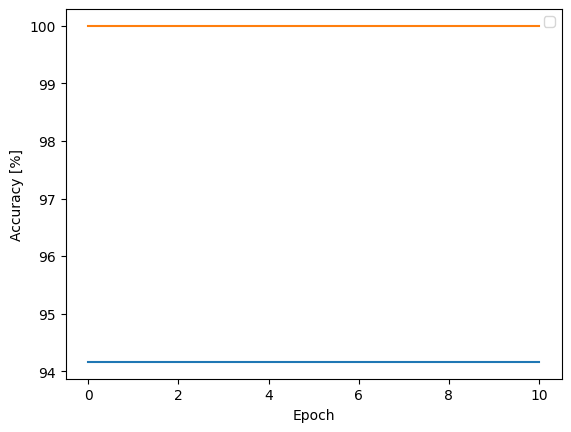

In [ ]:
import matplotlib.pyplot as plt

metrics = History.history
plt.plot(History.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy'], ['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [ ]:
model.evaluate(x,y)

108/108 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9475


[0.20268084108829498, 0.9474605917930603]

In [ ]:
y_pred = model.predict(x)
y_pred

108/108 [==============================] - 0s 4ms/step


array([[0.9309666 , 0.0708975 ],
       [0.9414736 , 0.05624506],
       [0.9281589 , 0.06595271],
       ...,
       [0.9281589 , 0.06595269],
       [0.9447748 , 0.05375005],
       [0.95127445, 0.04510274]], dtype=float32)

In [ ]:
print(sklearn.metrics.classification_report(np.argmax(y, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3246
           1       0.00      0.00      0.00       180

    accuracy                           0.95      3426
   macro avg       0.47      0.50      0.49      3426
weighted avg       0.90      0.95      0.92      3426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
